In [1]:
import zipfile
import os

# Define the filename of your zip file
zip_file_name = 'archive (5).zip'

# Define the directory where you want to extract the contents
# This will create a new folder named 'extracted_data' in the same location
# as your notebook.
extract_dir = 'extracted_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
try:
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Successfully extracted '{zip_file_name}' to the folder '{extract_dir}'")

    # List the files in the new directory to see your dataset files
    print("\nFiles found inside the extracted folder:")
    print(os.listdir(extract_dir))

except FileNotFoundError:
    print(f"Error: The file '{zip_file_name}' was not found. Make sure it's in the same directory as this notebook.")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

Successfully extracted 'archive (5).zip' to the folder 'extracted_data'

Files found inside the extracted folder:
['train.csv']


In [2]:
import pandas as pd
import os

# 1. Define the correct path to the CSV file
# We combine the folder name ('extracted_data') and the file name ('train.csv')
file_path = os.path.join('extracted_data', 'train.csv')

# 2. Load the CSV file into a Pandas DataFrame
df_train = pd.read_csv(file_path)

# 3. Print the first few rows to confirm the data loaded correctly
print("Data successfully loaded! Here are the first 5 rows:")
print(df_train.head())

# 4. (Optional) Check the data types and null counts
# print(df_train.info())

Data successfully loaded! Here are the first 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Sex
male      577
female    314
Name: count, dtype: int64

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(data=df_train, x='Age', kde=True, bins=20)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# histogram plot (for age)

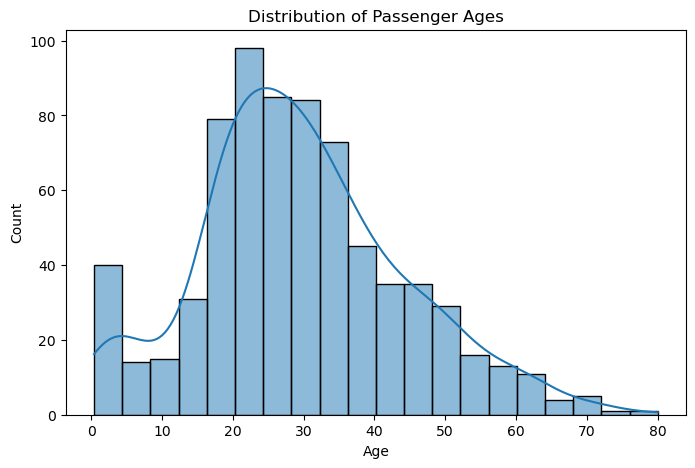

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(data=df_train, x='Age', kde=True, bins=20)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# histogram plot(for fare)


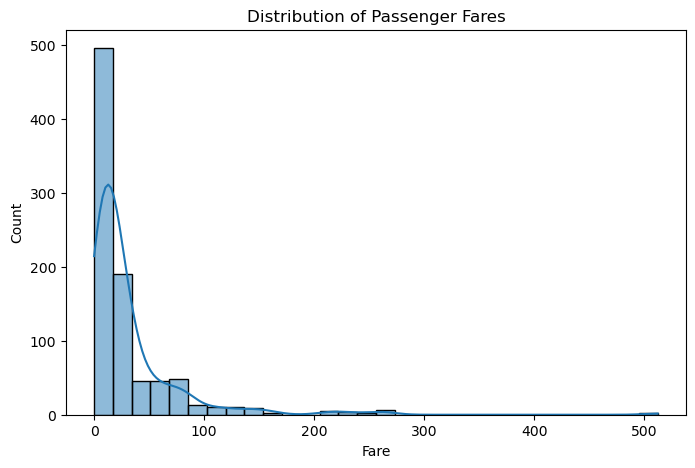

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_train, x='Fare', kde=True, bins=30)
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Boxplots (Bivariate Analysis)

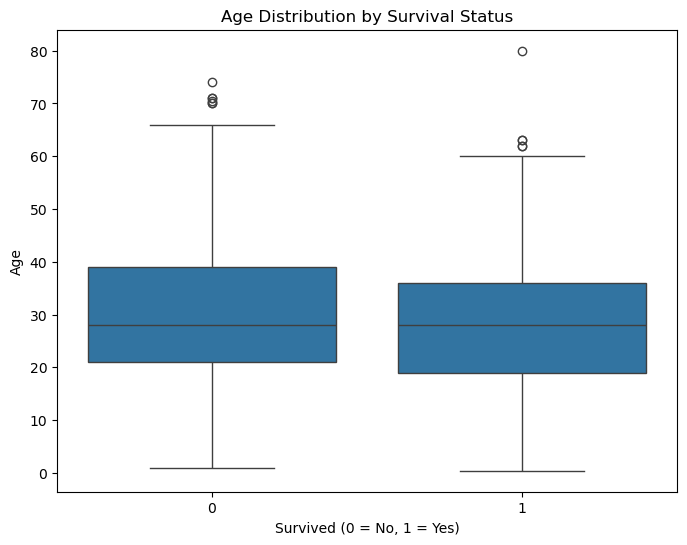

In [10]:
plt.figure(figsize=(8, 6))

# x='Survived' is the categorical variable (target)
# y='Age' is the numerical variable whose distribution we are comparing

sns.boxplot(x='Survived', y='Age', data=df_train)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Scatterplots (Bivariate/Multivariate Analysis)

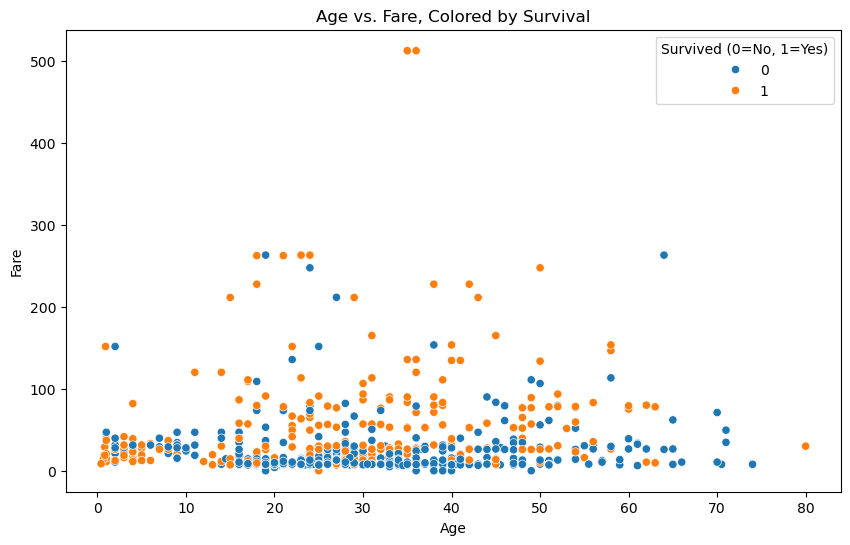

In [11]:
plt.figure(figsize=(10, 6))

# x='Age', y='Fare' are the numerical variables
# hue='Survived' separates the data points by color based on survival status

sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_train)
plt.title('Age vs. Fare, Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived (0=No, 1=Yes)')
plt.show()

# Correlation Heatmap (sns.heatmap())

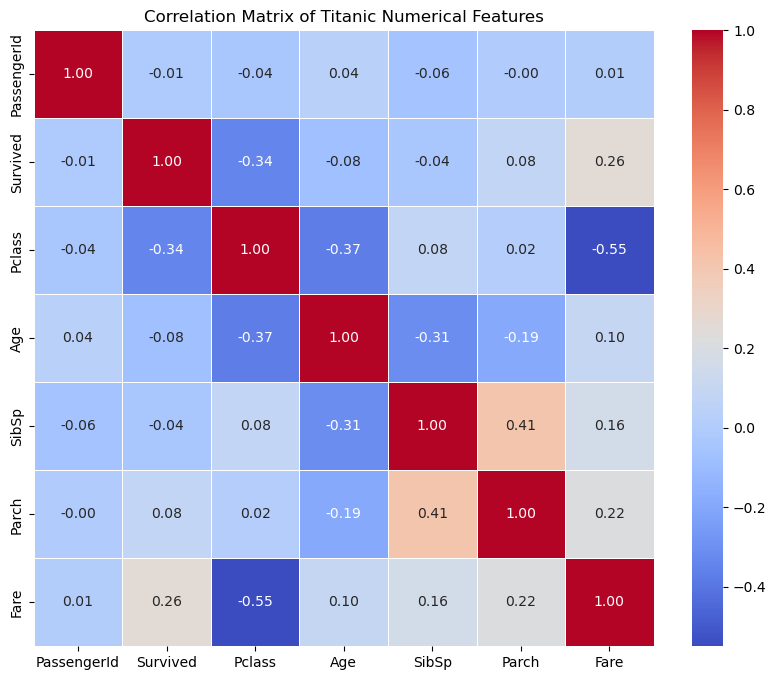

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the correlation matrix for all numerical features
# .corr() automatically selects only the numerical columns


correlation_matrix = df_train.corr(numeric_only=True)

# 2. Plot the heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,                                                         # Show the correlation values on the plot
    cmap='coolwarm',                                                    # Use a diverging color map (e.g., cool-to-warm)
    fmt=".2f",                                                            # Format numbers to 2 decimal places
    linewidths=.5,                                                       # Add lines between cells for clarity
    cbar=True                                                               # Show the color bar
)
plt.title('Correlation Matrix of Titanic Numerical Features')
plt.show()

#  Pairplot (sns.pairplot())


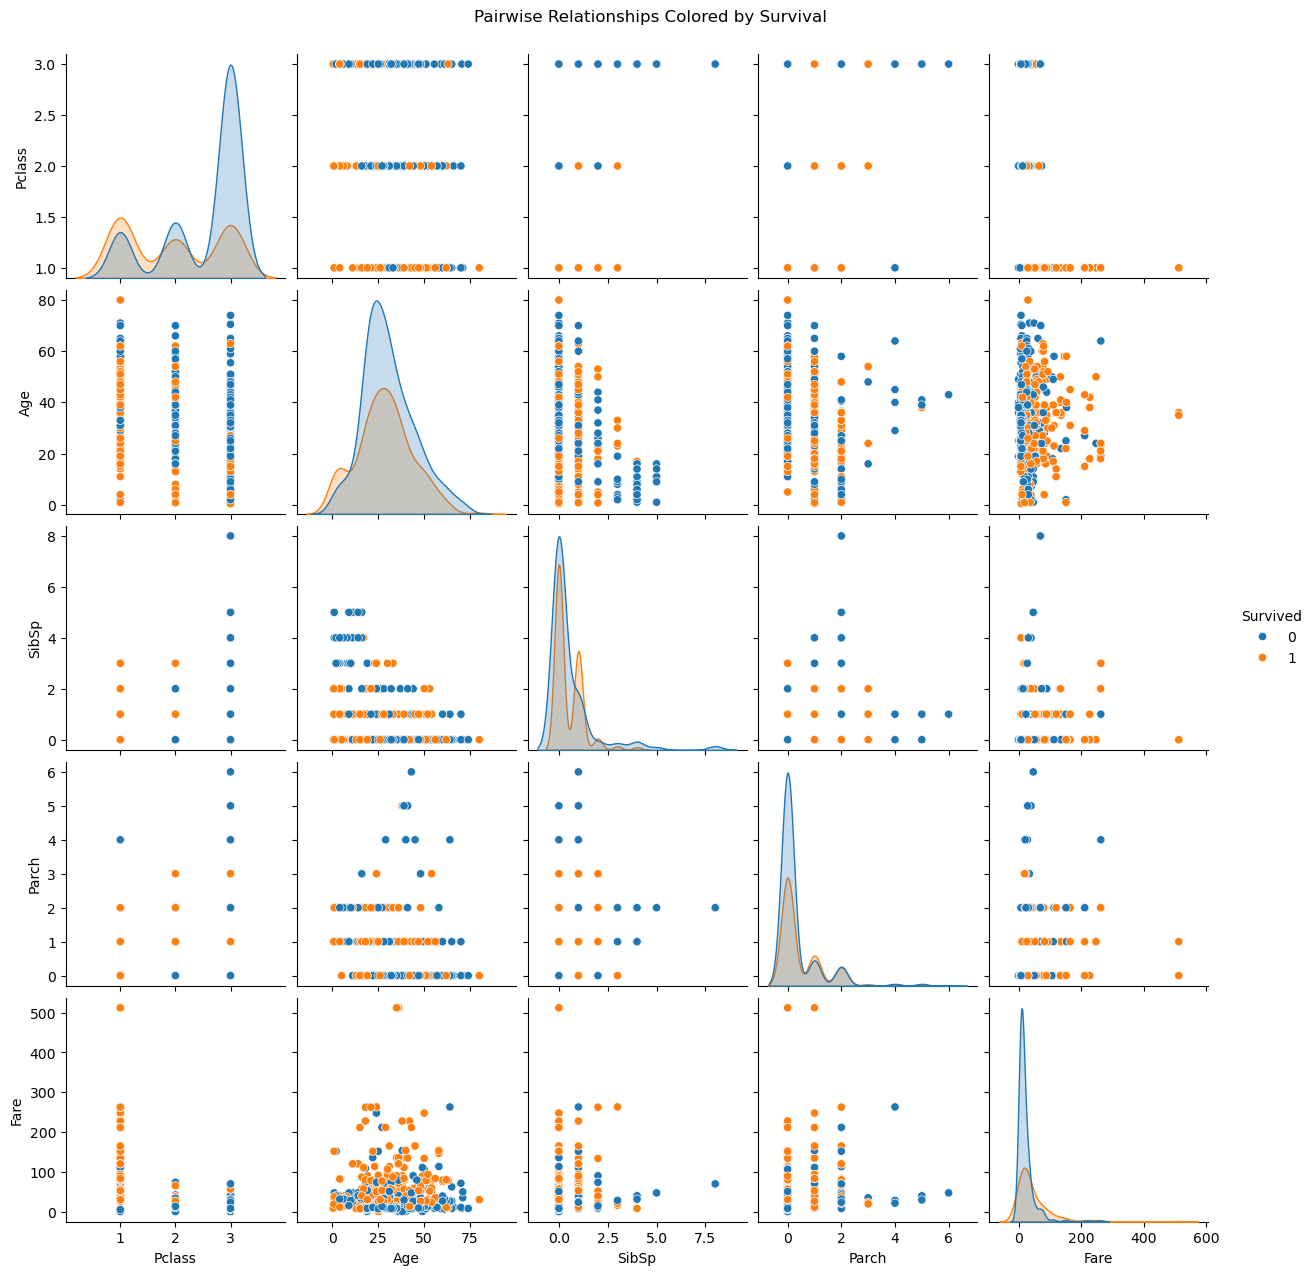

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key numerical columns and the target variable

cols_to_plot = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create the pairplot

sns.pairplot(
    df_train[cols_to_plot], 
    hue='Survived',                                                 # Color-code the data points based on survival (0 or 1)
    diag_kind='kde'                                                  # Use a Kernel Density Estimate plot for the diagonal (smoother)
)
plt.suptitle('Pairwise Relationships Colored by Survival', y=1.02)               # Add a title to the figure
plt.show()

# Identify relationships and trends